<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>


<b>Комментарий от ревьюера</b>

Привет! Меня зовут Ярослав Кальманов, я буду делать ревью твоего проекта. Давай будем общаться на «ты».

Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 
Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я принял проект. 
</div>
<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь сделать немного по-другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">
Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.  
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___



# Описание проекта

Доброго дня! Мы получили описание проекта, данные к нему. Задача - сделать вывод — какой тариф лучше. Для начала выполним типовые действия, которые мы знаем с начала курса. Создадим переменные с полными путями до источников данных, для облегчения работы проверки другим аналитикам.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

## Просмотр данных

Для начала, просмотрим общую таблицу с пользователями (информацию о ней).

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Посмотрим на пропуски.

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Мы видим везде по 500 значений, однако в графе churn_date - 38. Сверимся с описанием: churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Таким образом, делать с ним мы ничего не будем. Посмотрим тогда на уникальность.

In [5]:
print("Число строк:", users.shape[0])
print("Число уникальных:", users['user_id'].count())
print("Число дубликатов:", users.duplicated().sum())

Число строк: 500
Число уникальных: 500
Число дубликатов: 0


С этой точки зрения таблица валидная. Дубликатов в ней нет. Посмотрим на следующую таблицу.

In [6]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Мы видим 202607 строк для всех параметров. Всё верно, данные без пропусков.

Обратим внимание, что согласно задания, нам необходимо работать с месяцами, поэтому переведём формат в datetime и определим месяц. Напишем только функцию, поскольку мы ещё не добрались до раздела обработки данных.

In [8]:
def date_to_dt_month (dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month'] = df[column].apply(lambda x: x.month)

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Будет лучше, если все названия всех признаков будут на английской языке.
</div>

<div class="alert alert-info">
    
Да, всё верно. Исправлю всё.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>


👍

</div>


Далее, собственно с вызовами. Посмотрим на гистограмму, чтобы определить длительность звонков.

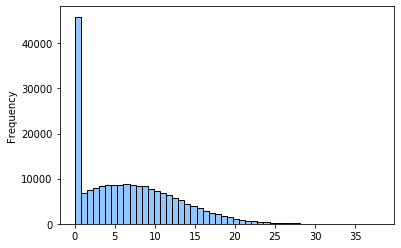

In [9]:
plt.style.use('seaborn-pastel')
calls['duration'].plot(kind='hist', ec='black', bins=50)

В гистограмме есть нулевые звонки. Вспомним примечание "Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.". Тогда откуда появились нулевые?

In [10]:
zero_calls = calls.query('duration == 0.0')
zero_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


39613 строк. Посмотрим на первого такого пользователя.

In [11]:
calls.query('duration == 0.0 and user_id == 1000')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
329,1000_329,2018-10-29,0.0,1000
341,1000_341,2018-11-29,0.0,1000
345,1000_345,2018-10-14,0.0,1000
351,1000_351,2018-09-28,0.0,1000


In [12]:
zero_calls.groupby('duration')['user_id'].nunique()

duration
0.0    492
Name: user_id, dtype: int64

У нас содержится всего 492 уникальных значения (пользователя), которые имеют нулевую длительность или

In [13]:
calls.groupby('duration')['user_id'].nunique()

duration
0.00     492
0.01      87
0.02      74
0.03      71
0.04      73
        ... 
35.95      1
36.12      1
36.47      1
37.35      1
38.00      1
Name: user_id, Length: 2871, dtype: int64

Считаю, что эти "нулевые" строки надо удалить на этапе предобработки.

In [14]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

In [15]:
calls.groupby('duration')['user_id'].nunique()

duration
0.01     87
0.02     74
0.03     71
0.04     73
0.05     71
         ..
35.95     1
36.12     1
36.47     1
37.35     1
38.00     1
Name: user_id, Length: 2870, dtype: int64

In [16]:
calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000


Прекрасно иметь дело с правильной выборкой. Однако, "«Мегалайн» всегда округляет вверх значения минут и мегабайт. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута". Округлим. Значения указаны в минутах.

In [17]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Длительность звонков нужно округлить вверх, т.е. 5.18 -> 6.0
    
Поищи подходящую функцию в библиотеке numpy.
</div>


<div class="alert alert-info">
    
Верно, поправил.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что поправил код

</div>

Перейдём к сообщениям.

In [18]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Всё хорошо, но не забыть заменить datetime. Идём дальше.

In [20]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [21]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


session_date тоже изменим на datetime. Но здесь есть ещё один важный момент.  "«Мегалайн» всегда округляет вверх значения минут и мегабайт. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута". И округлим так.

In [22]:
internet['mb_used'] = internet['mb_used'].round()
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1197.0,2018-06-25,1000
3,3,1000_3,550.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000


Выведем гистограмму распределения использования интернет-трафика в сессиях:

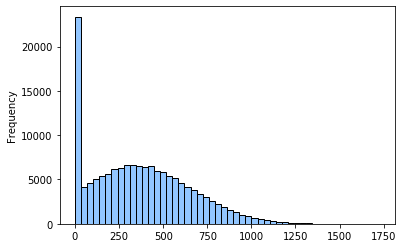

In [23]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

Нули - это всегда плохо. Или хорошо?

In [24]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


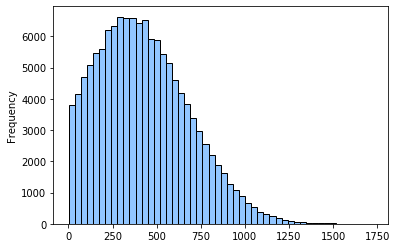

In [25]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

Прекрасно, мы удалили нули  -вероятнее всего, это обрывочные сессии. Теперь график приобрёл приемлемый вид.

И последнее, посмотрим на таблицу тарифов, это справочные значения.

In [26]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

## Обработка и добавление данных

Выше мы уже писали о проблеме в столбцах с datetime, поэтому изменим их. Также, добавим месяц. Мы уже писали функцию.

In [27]:
date_to_dt_month([users, calls, messages, internet])
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [28]:
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


In [29]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [30]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1197.0,2018-06-25,1000,6
3,3,1000_3,550.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9


Посчитаем для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Создадим общую переменную df_event, содержащую информацию по основным параметрам, путём конкатенации.

In [31]:
num_of_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
num_of_messages = messages.groupby(['user_id', 'month'])['id'].count()
num_of_internet = internet.groupby(['user_id', 'month']).sum()['mb_used']
df_event = pd.concat([num_of_calls, num_of_messages, num_of_internet], axis=1)
df_event = df_event.reset_index()
df_event.head()

,user_id,month,count,sum,id,mb_used
0,1000,5,17.0,159.0,22.0,2253.0
1,1000,6,28.0,172.0,60.0,23232.0
2,1000,7,41.0,340.0,75.0,14004.0
3,1000,8,42.0,408.0,81.0,14054.0
4,1000,9,46.0,466.0,57.0,14569.0


Добавим тариф и город.

In [32]:
#map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
#df_event['Tariff'] = df_event['user_id'].map(map_to_fill_tariff)
#map_to_fill_city = dict(pd.Series(users['city'].values, index=users['user_id']))
#df_event['City'] = df_event['user_id'].map(map_to_fill_city)

df_event = pd.merge(df_event, users[['user_id', 'tariff', 'city']])

In [33]:
df_event

,user_id,month,count,sum,id,mb_used,tariff,city
0,1000,5,17.0,159.0,22.0,2253.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23232.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14004.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14054.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14569.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20581.0,smart,Владикавказ
3210,1499,9,8.0,70.0,11.0,1846.0,smart,Пермь
3211,1499,10,44.0,449.0,48.0,17792.0,smart,Пермь
3212,1499,11,62.0,612.0,59.0,17963.0,smart,Пермь


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Давай немного попрактикуемся в объединении таблиц и с помощью метода merge объединим df_event и users[['user_id', 'tariff', 'city']]. Тебе еще не раз придется сталкиваться с объединением таблиц, поэтому важно научиться это делать
</div>

<div class="alert alert-info">
    
Сделано.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

👍

</div>


Для удобства переименуем столбцы.

In [34]:
df_event.columns = ['Num_user', 'Month', 'Number_of_calls', 'Calls_min', 
                            'Sms_num', 'Internet_mb', 'Tariff', 'City']

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>

Неужели тебе удобно переключать раскладку на рус., когда обращаешься к названиям признаков? Уверен, используя названия на английском, тебе будет намного удобнее писать код (если не сейчас, то в будущем).

Когда ты делал самый первый проект про музыкальные предпочтения жителей МСК и СПБ, поднимался вопрос правильных названий признаков (вероятно еще где-то в тренажере поднимался).
    
Цитата из того проекта:  
    
    В названиях колонок видны три нарушения стиля:
        1. Строчные буквы сочетаются с прописными.
        2. Встречаются пробелы.
        3. Несоблюдение snake_case / отсутствие нижних подчёркиваний

Ты тут смог допустить все три нарушения. Давай изменим названия признаков на корректные.
    
</div>

<div class="alert alert-info">
    
Это очень нехорошо, теперь я понимаю. Исправлено.
</div>

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера 2</b>
    
Молодец, что поправил, но лучше не использовать прописные буквы в названиях признаков
</div>

In [35]:
df_event.sort_values(by=['Num_user', 'Month']).head(10)

,Num_user,Month,Number_of_calls,Calls_min,Sms_num,Internet_mb,Tariff,City
0,1000,5,17.0,159.0,22.0,2253.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23232.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14004.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14054.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14569.0,ultra,Краснодар
5,1000,10,44.0,350.0,73.0,14701.0,ultra,Краснодар
6,1000,11,37.0,338.0,58.0,14756.0,ultra,Краснодар
7,1000,12,38.0,333.0,70.0,9818.0,ultra,Краснодар
8,1001,11,45.0,430.0,NaN,18428.0,smart,Москва
9,1001,12,47.0,414.0,NaN,14040.0,smart,Москва


Отличная сводная таблица, посмотрим на неё издалека.

In [36]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
Num_user           3214 non-null int64
Month              3214 non-null int64
Number_of_calls    3168 non-null float64
Calls_min          3168 non-null float64
Sms_num            2717 non-null float64
Internet_mb        3201 non-null float64
Tariff             3214 non-null object
City               3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


И на пропущенные мегабайты.

In [37]:
df_event[df_event['Internet_mb'].isnull()]

,Num_user,Month,Number_of_calls,Calls_min,Sms_num,Internet_mb,Tariff,City
592,1094,5,12.0,107.0,3.0,NaN,ultra,Новосибирск
1722,1273,5,19.0,220.0,21.0,NaN,ultra,Курган
1723,1273,6,28.0,230.0,38.0,NaN,ultra,Курган
1724,1273,7,30.0,253.0,37.0,NaN,ultra,Курган
1725,1273,8,39.0,253.0,41.0,NaN,ultra,Курган
1726,1273,9,28.0,223.0,32.0,NaN,ultra,Курган
1727,1273,10,35.0,315.0,35.0,NaN,ultra,Курган
1728,1273,11,31.0,272.0,29.0,NaN,ultra,Курган
1729,1273,12,38.0,260.0,39.0,NaN,ultra,Курган
2306,1365,10,5.0,43.0,1.0,NaN,smart,Ростов-на-Дону


Мы видим, что пользователи активные - есть звонки, есть смс, но в данных о трафике - пропуски. Справедливо заполнить их нулями - вероятно, в связи с неиспользованием, значение таблицы осталось таким же, как при создании (NaN).


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты прав, пропуски тут стоит заполнить нулями
</div>

In [38]:
df_event = df_event.fillna(0)
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
Num_user           3214 non-null int64
Month              3214 non-null int64
Number_of_calls    3214 non-null float64
Calls_min          3214 non-null float64
Sms_num            3214 non-null float64
Internet_mb        3214 non-null float64
Tariff             3214 non-null object
City               3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


Всё это хорошо, но надо двигаться дальше, ведь нас просят ещё и посчитать помесячную выручку с каждого пользователя. Тарифа у нас два,  и значения известны из справочника.

In [39]:
month_price = {'smart': 550, 'ultra': 1950}
df_event['Abonent_rub'] = df_event['Tariff'].map(month_price)
df_event.head(10)

,Num_user,Month,Number_of_calls,Calls_min,Sms_num,Internet_mb,Tariff,City,Abonent_rub
0,1000,5,17.0,159.0,22.0,2253.0,ultra,Краснодар,1950
1,1000,6,28.0,172.0,60.0,23232.0,ultra,Краснодар,1950
2,1000,7,41.0,340.0,75.0,14004.0,ultra,Краснодар,1950
3,1000,8,42.0,408.0,81.0,14054.0,ultra,Краснодар,1950
4,1000,9,46.0,466.0,57.0,14569.0,ultra,Краснодар,1950
5,1000,10,44.0,350.0,73.0,14701.0,ultra,Краснодар,1950
6,1000,11,37.0,338.0,58.0,14756.0,ultra,Краснодар,1950
7,1000,12,38.0,333.0,70.0,9818.0,ultra,Краснодар,1950
8,1001,11,45.0,430.0,0.0,18428.0,smart,Москва,550
9,1001,12,47.0,414.0,0.0,14040.0,smart,Москва,550


Теперь напишем функцию, которая будет считать превышения.

In [40]:
def calls_over_plan(row):
    if row['Tariff'] == 'smart':
        result = row['Calls_min'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Calls_min'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over_plan(row):
    if row['Tariff'] == 'smart':
        result = row['Sms_num'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['Sms_num'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over_plan(row):
    if row['Tariff'] == 'smart':
        result = row['Internet_mb'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Internet_mb'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_revenue(row):
    sum_per_month = 0
    if row['Tariff'] == 'smart':
        sum_per_month += np.ceil(row['Minuts_up']) * 3
        sum_per_month += row['Sms_up'] * 3
        sum_per_month += np.ceil(row['Mb_up']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['Minuts_up']) * 1
        sum_per_month += row['Sms_up'] * 1
        sum_per_month += np.ceil(row['Mb_up']/1024) * 150
        return sum_per_month

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Абонентскую плату и лимиты лучше брать из таблицы tariffs, потому что иначе оператор может изменить условия тарифов, и тебе придется вносить правки вручную.
</div>

<div class="alert alert-info">
    
Хорошо, учту.
</div>

Плюс нужно создать новые столбцы, где отражать результат функции.

In [41]:
df_event['Minuts_up'] = df_event.apply(calls_over_plan, axis=1)
df_event['Sms_up'] = df_event.apply(sms_over_plan, axis=1)
df_event['Mb_up'] = df_event.apply(internet_over_plan, axis=1)

df_event['Pay_over_limit_rub'] = df_event.apply(month_revenue, axis=1)

for column in ['Minuts_up', 'Mb_up']:
    df_event[column] = df_event[column].astype('float')

for column in ['Sms_up', 'Pay_over_limit_rub']:
    df_event[column] = df_event[column].astype('int')

In [42]:
df_event.head(10)

,Num_user,Month,Number_of_calls,Calls_min,Sms_num,Internet_mb,Tariff,City,Abonent_rub,Minuts_up,Sms_up,Mb_up,Pay_over_limit_rub
0,1000,5,17.0,159.0,22.0,2253.0,ultra,Краснодар,1950,0.0,0,0.0,0
1,1000,6,28.0,172.0,60.0,23232.0,ultra,Краснодар,1950,0.0,0,0.0,0
2,1000,7,41.0,340.0,75.0,14004.0,ultra,Краснодар,1950,0.0,0,0.0,0
3,1000,8,42.0,408.0,81.0,14054.0,ultra,Краснодар,1950,0.0,0,0.0,0
4,1000,9,46.0,466.0,57.0,14569.0,ultra,Краснодар,1950,0.0,0,0.0,0
5,1000,10,44.0,350.0,73.0,14701.0,ultra,Краснодар,1950,0.0,0,0.0,0
6,1000,11,37.0,338.0,58.0,14756.0,ultra,Краснодар,1950,0.0,0,0.0,0
7,1000,12,38.0,333.0,70.0,9818.0,ultra,Краснодар,1950,0.0,0,0.0,0
8,1001,11,45.0,430.0,0.0,18428.0,smart,Москва,550,0.0,0,3068.0,600
9,1001,12,47.0,414.0,0.0,14040.0,smart,Москва,550,0.0,0,0.0,0


Но нам нужна ещё строка "Сумма за месяц", складывающаяся из "Аб. плата" и "Плата сверх лимита".

In [43]:
df_event['Sum_month_rub'] = df_event['Abonent_rub'] + df_event['Pay_over_limit_rub']
df_event.head(10)

,Num_user,Month,Number_of_calls,Calls_min,Sms_num,Internet_mb,Tariff,City,Abonent_rub,Minuts_up,Sms_up,Mb_up,Pay_over_limit_rub,Sum_month_rub
0,1000,5,17.0,159.0,22.0,2253.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
1,1000,6,28.0,172.0,60.0,23232.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
2,1000,7,41.0,340.0,75.0,14004.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
3,1000,8,42.0,408.0,81.0,14054.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
4,1000,9,46.0,466.0,57.0,14569.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
5,1000,10,44.0,350.0,73.0,14701.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
6,1000,11,37.0,338.0,58.0,14756.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
7,1000,12,38.0,333.0,70.0,9818.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
8,1001,11,45.0,430.0,0.0,18428.0,smart,Москва,550,0.0,0,3068.0,600,1150
9,1001,12,47.0,414.0,0.0,14040.0,smart,Москва,550,0.0,0,0.0,0,550



<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, ты правильно посчитал размер месячных платежей.
</div>



Проверим превышение лимитов.

In [44]:
df_event[df_event['Sum_month_rub'] > 1950]

,Num_user,Month,Number_of_calls,Calls_min,Sms_num,Internet_mb,Tariff,City,Abonent_rub,Minuts_up,Sms_up,Mb_up,Pay_over_limit_rub,Sum_month_rub
67,1009,7,20.0,183.0,14.0,24728.0,smart,Пермь,550,0.0,0,9368.0,2000,2550
68,1009,8,27.0,249.0,9.0,23707.0,smart,Пермь,550,0.0,0,8347.0,1800,2350
86,1011,11,52.0,501.0,12.0,25302.0,smart,Самара,550,1.0,0,9942.0,2003,2553
87,1011,12,44.0,361.0,6.0,22873.0,smart,Самара,550,0.0,0,7513.0,1600,2150
90,1012,5,35.0,316.0,10.0,26609.0,smart,Санкт-Петербург,550,0.0,0,11249.0,2200,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1496,8,62.0,527.0,41.0,23532.0,smart,Вологда,550,27.0,0,8172.0,1681,2231
3199,1496,9,58.0,486.0,29.0,26934.0,smart,Вологда,550,0.0,0,11574.0,2400,2950
3200,1496,10,56.0,450.0,35.0,28188.0,smart,Вологда,550,0.0,0,12828.0,2600,3150
3201,1496,11,66.0,662.0,46.0,25069.0,smart,Вологда,550,162.0,0,9709.0,2486,3036


Таких нашлось 556. Построим гистограмму переплат.

Text(0.5, 0, 'Переплата')

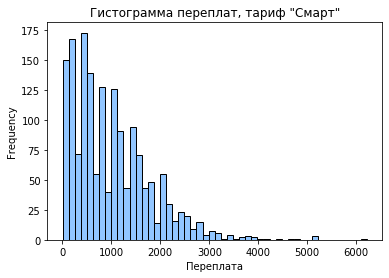

In [45]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered = df_event[(df_event['Tariff'] == 'smart') & 
                               (df_event['Pay_over_limit_rub'] > 0)]['Pay_over_limit_rub']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50).set_xlabel('Переплата')

Переплачивают довольно много, если учесть сумму тарифа "Смарт". А теперь - Ультра.

Text(0.5, 0, 'Переплата')

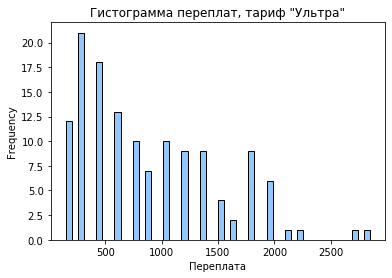

In [46]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered = df_event[(df_event['Tariff'] == 'ultra') & 
                               (df_event['Pay_over_limit_rub'] > 0)]['Pay_over_limit_rub']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50).set_xlabel('Переплата')

Тут, переплачивают порядка 1500 р., а в предыдущем тарифе - 1200. Всё равно много.

Посмотрим, что чаще дозаказывают пользователи каждого из тарифов:

In [47]:
(df_event.groupby('Tariff').sum()[['Minuts_up', 'Sms_up', 'Mb_up']]).reset_index()

,Tariff,Minuts_up,Sms_up,Mb_up
0,smart,92739.0,12928,6142507.0
1,ultra,0.0,0,738819.0


Обратим внимание, что <b>пользователи тарифа smart доказывают услуги каждого типа связи. Пользователи тарифа ultra - только интернет</b>.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что отдельно рассмотрел переплату по тарифу
</div>



## Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Нам надо зафиксировать выбросы и отфильтровать их. Поэтому сначала зададим нижнее и верхнее значения усов через 2 и 98 квантили и построим один boxplot, потом построим boxplot со стандартным межквартильным размахом, равным 1,5, через функцию.

In [48]:
def box_plot(whis):
    column_list = ['Calls_min', 'Sms_num', 'Internet_mb']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(40,15))

    for r in range(rows):
        for c in range(cols):
            ax = df_event.boxplot(column=column_list[column_list_counter], by='Tariff', fontsize=40, ax=axes[c],
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, whis=whis)
            ax.set_title(column_list[column_list_counter])
            ax.title.set_size(40)
            ax.set_xlabel('')
            plt.suptitle('Boxplot с whis = {}'.format(whis), y=1, fontsize=45, fontweight='bold')
            column_list_counter += 1

Построим боксплот, используя стандартный межквартильный размах 1,5. При этом отключим вывод дополнительных ошибок.

In [49]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

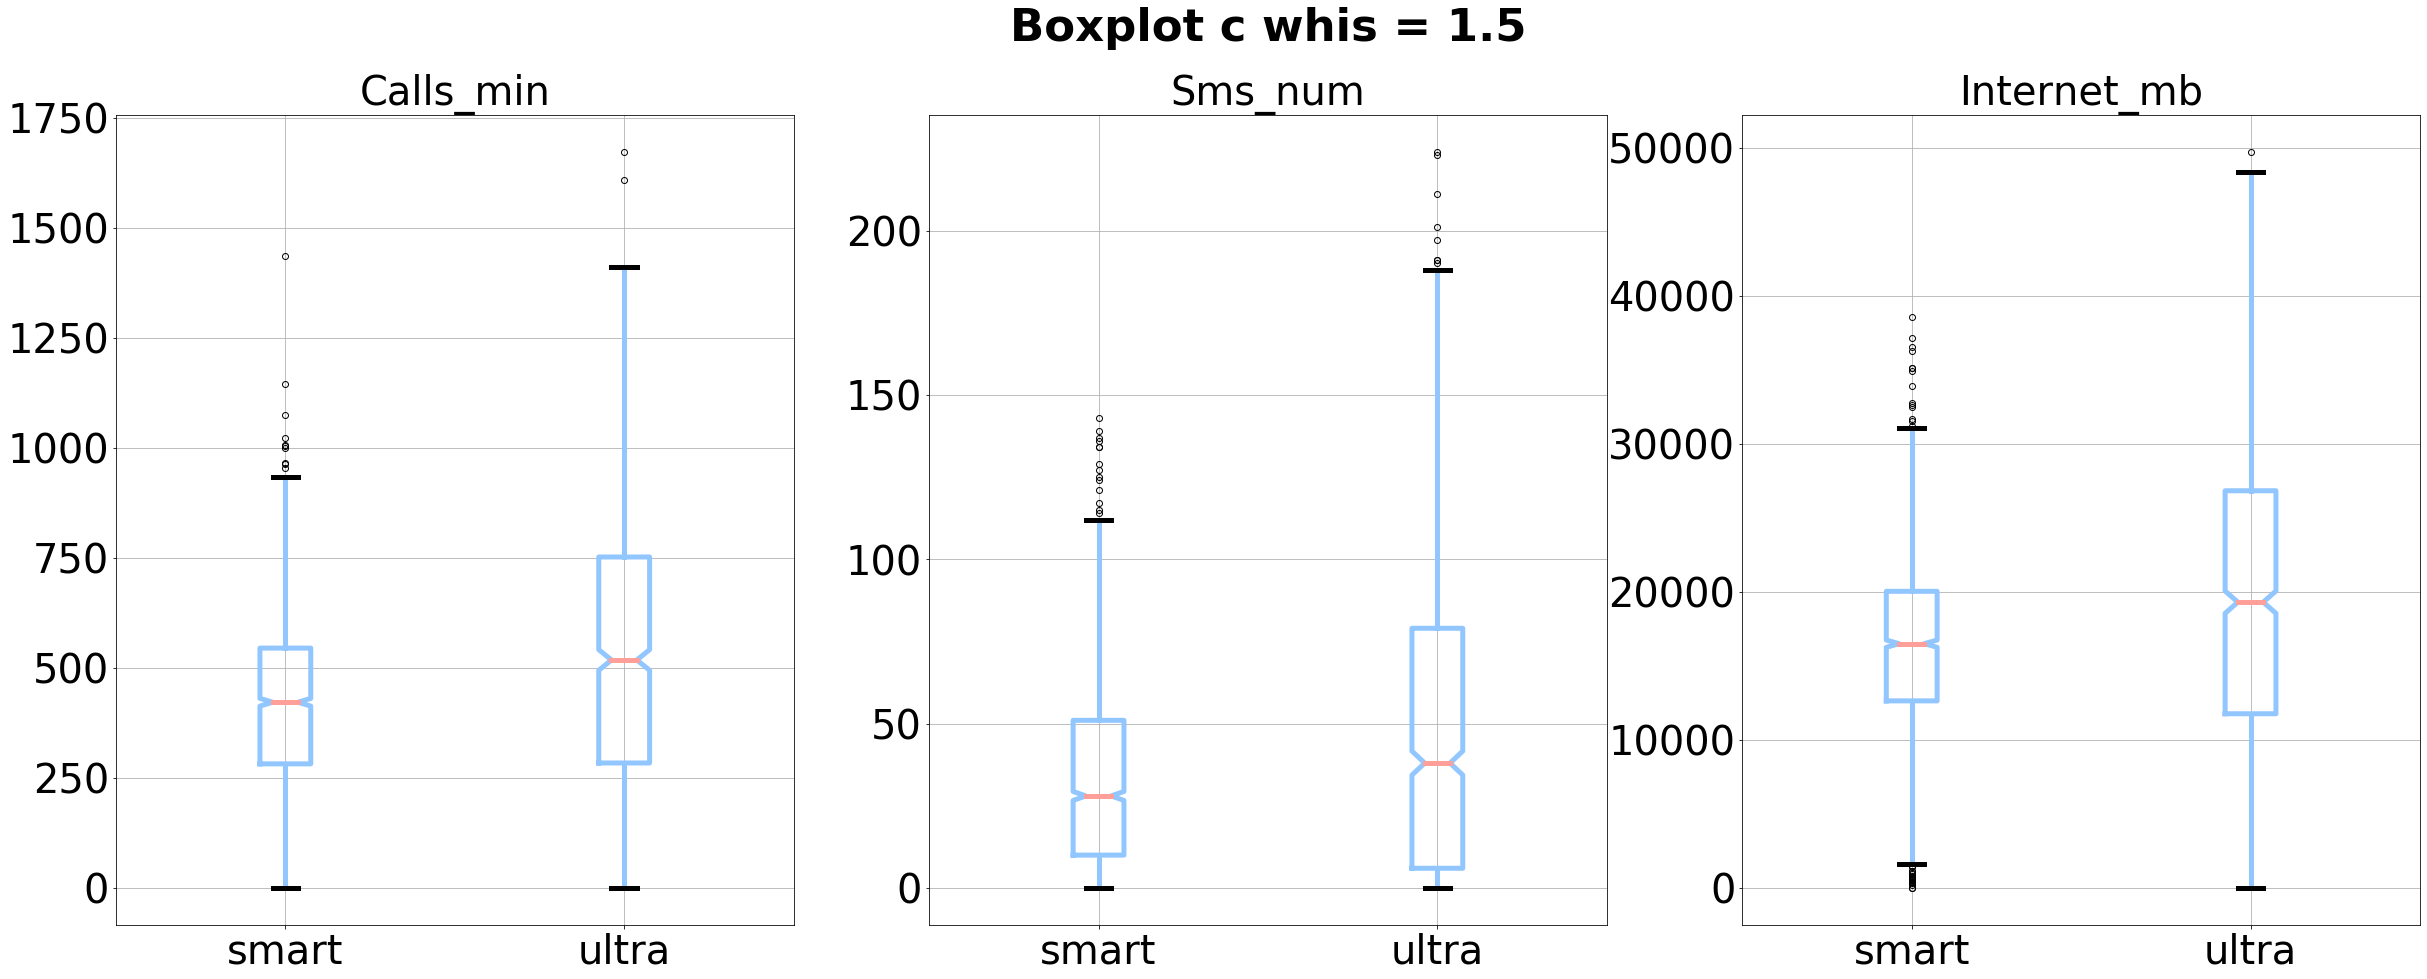

In [50]:
box_plot(1.5)

Нам нужно доказать или опровергнуть утверждение, что "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". Фу, как некрасиво. Напишем функцию разделения.

In [51]:
def get_intervals(column, data_filter):
    
    if data_filter == 'Tariff':
        format_name = column
        data1, data2 = 'smart', 'ultra'
        format_end1 = 'тарифа "Смарт"'
        format_end2 = 'тарифа "Ультра"'
    elif data_filter == 'is_Moscow':
        format_name = 'is_Moscow'
        data1, data2 = 0, 1
        format_end1 = 'для регионов'
        format_end2 = 'для Москвы'
    
    q1_1 = df_event[df_event[data_filter] == data1][column].quantile(0.25)
    q3_1 = df_event[df_event[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    if data_filter == 'is_Moscow':
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 550, q1_1 - 1.5 * diff_1, 550)
    else:
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 0, q1_1 - 1.5 * diff_1, 0)
    
    right_int_1 = np.where( (q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = df_event[df_event[data_filter] == data2][column].quantile(0.25)
    q3_2 = df_event[df_event[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    if data_filter == 'is_Moscow':
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 550, q1_2 - 1.5 * diff_2, 550)
    else:
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 0, q1_2 - 1.5 * diff_2, 0)
        
    right_int_2 = np.where( (q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)

А теперь найдём границы интервала по длительности.

In [52]:
calls_int_smart, calls_int_ultra = get_intervals('Calls_min', 'Tariff')

Границы интервала для столбца "Calls_min" тарифа "Смарт": 0.0 - 939.5
Границы интервала для столбца "Calls_min" тарифа "Ультра": 0.0 - 1454.0


Границы интервала по количеству отправленных смс.

In [53]:
sms_int_smart, sms_int_ultra = get_intervals('Sms_num', 'Tariff')

Границы интервала для столбца "Sms_num" тарифа "Смарт": 0.0 - 112.5
Границы интервала для столбца "Sms_num" тарифа "Ультра": 0.0 - 188.5


Границы интервала по количеству использованного трафика:

In [54]:
internet_int_smart, internet_int_ultra = get_intervals('Internet_mb', 'Tariff')

Границы интервала для столбца "Internet_mb" тарифа "Смарт": 1538.0 - 31146.0
Границы интервала для столбца "Internet_mb" тарифа "Ультра": 0.0 - 49436.0


Теперь, согласно задания, нужно построить по всем этим данным. Однако, нам также необходимо вывести данные по среднему, дисперсии и стандартному отклонению. Напишем функцию.

In [55]:
def plot_hist_comparison(data):
    
    ax = plt.gca()
    func_dict = {'Звонки': 'Calls_min', 'СМС': 'Sms_num', 'Интернет': 'Internet_mb'}
    xlims = [(calls_int_smart[0], calls_int_smart[1]), (calls_int_ultra[0], calls_int_ultra[1]),
             (sms_int_smart[0], sms_int_smart[1]), (sms_int_ultra[0], sms_int_ultra[1]),
             (internet_int_smart[0], internet_int_smart[1]), (internet_int_ultra[0], internet_int_ultra[1])]
    
    filt_column = func_dict[data]

    # оформление в зависимости от рассматриваемых данных
    if data == 'Звонки':
        title = 'Гистограмма длительности звонков, мин.'
        xlim1 = xlims[0]
        xlim2 = xlims[1]
        text_x = (58, 8)
        text_y = 118
        count_text_x = 1150
        count_text_y = 75
        alpha = 0.8
        # annot_xy = (990, 60)
        # annot_xytext = (970, 70)
    elif data == 'СМС':
        title = 'Гистограмма количества отправленных СМС, шт.'
        xlim1 = xlims[2]
        xlim2 = xlims[3]
        text_x = (5.5, 1)
        text_y = 200
        count_text_x = 148
        count_text_y = 230
        alpha = 1
        # annot_xy = (133, 220)
        # annot_xytext = (130, 260)
    else:
        title = 'Гистограмма количества использованного интернет-трафика, Мб'
        xlim1 = xlims[4]
        xlim2 = xlims[5]
        text_x = (3300, 200)
        text_y = 130
        count_text_x = 38000
        count_text_y = 82
        alpha = 0.8
        # annot_xy = (31100, 73)
        # annot_xytext = (30400, 86)
    
    # получаем отфильтрованные от выбросов датафреймы
    filtered_smart_data = df_event[(df_event['Tariff'] == 'smart') &
                                           (df_event[filt_column] >= xlim1[0]) &
                                           (df_event[filt_column] <= xlim1[1])][filt_column]
    filtered_ultra_data = df_event[(df_event['Tariff'] == 'ultra') &
                                           (df_event[filt_column] >= xlim2[0]) &
                                           (df_event[filt_column] <= xlim2[1])][filt_column]
    # рисуем
    filtered_smart_data.plot(kind='hist', bins=40, figsize=(12,6), ec='black', ax=ax, color='#92c6ff', 
                             title=title, xlim=xlim1)
    filtered_ultra_data.plot(kind='hist', bins=70, figsize=(12,6), ec='black', ax=ax, color='#97F0AA', 
                             title=title, xlim=xlim2, alpha=alpha)
    
    # расчетные данные
    mean_smart = filtered_smart_data.mean()
    mean_ultra = filtered_ultra_data.mean()
    dispersion_smart = filtered_smart_data.var()
    dispersion_ultra = filtered_ultra_data.var()
    std_smart = filtered_smart_data.std()
    std_ultra = filtered_ultra_data.std()
    
    if data == 'СМС':
        smart_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    else:
        smart_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    
    legend_second = plt.legend([smart_data, ultra_data], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    
    # рисуем медианы
    plt.axvline(x=filtered_smart_data.median(),linewidth=3, color='#16B4DC', linestyle='--')
    ax.text(filtered_smart_data.median()-text_x[0], text_y, '{0:.0f}'.format(filtered_smart_data.median()), 
            fontweight='bold', fontsize='large')
    plt.axvline(x=filtered_ultra_data.median(),linewidth=3, color='#35B815', linestyle='--')
    ax.text(filtered_ultra_data.median()+text_x[1], text_y, '{0:.0f}'.format(filtered_ultra_data.median()), 
            fontweight='bold', fontsize='large')
    
    plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})
    ax.text(count_text_x, count_text_y, 'Расчётные данные', fontweight='bold', fontsize='large')
    
    # ax.annotate('Расчётные данные', xy=annot_xy, xytext=annot_xytext, arrowprops=dict(facecolor='black', shrink=0.05),
                # horizontalalignment='right', verticalalignment='top')

Осталось сравнить. Выводим гистограмму по длительности звонков.

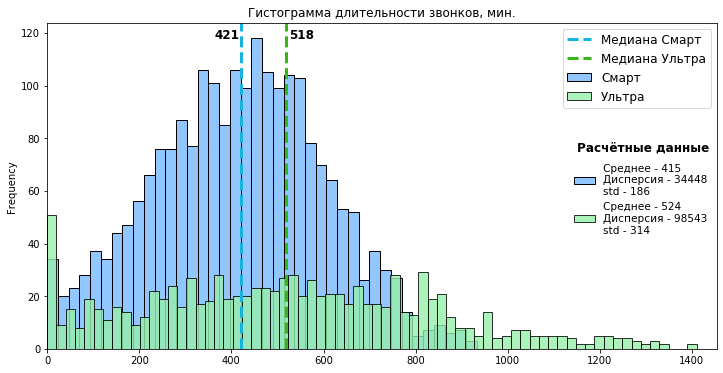

In [56]:
plot_hist_comparison('Звонки')


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Отличный график
</div>


Медиана здесь равна 421 минуте. А люди разговаривают 200 - 600 минут в месяц на тарифе "Смарт". На "Ультре" ситуация другая - медиана равна 518 минут, то есть больше, чем у "Смарта".

Посмотрим на смс.

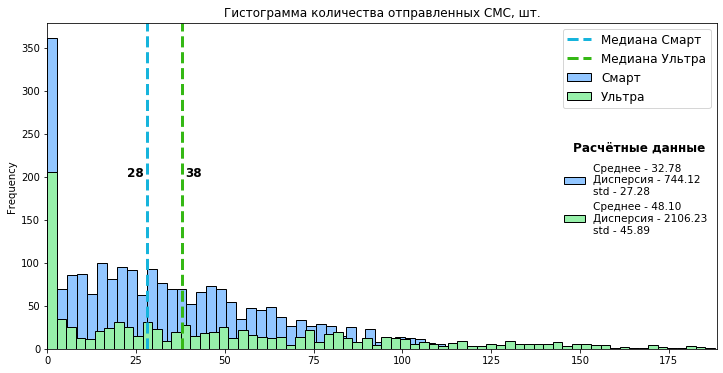

In [57]:
plot_hist_comparison('СМС')

Опять мы видим разницу в медианах "Смарт" и "Ультра". И в среднем на "Смарте" пишут 32 смс, а на "Ультре" - 48.

Посмотрим, что с трафиком.

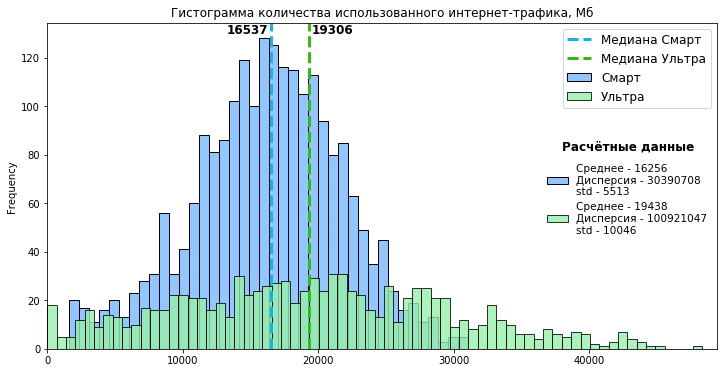

In [58]:
plot_hist_comparison('Интернет')

Здесь, по-моему, самое интересное. Ведь у тарифа "Смарт" пользователи регулярно вылезают медианой за ограничение абонентской платы (15 Гб). А вот на "Ультре" всё наоборот. 19 против 30 - получается, пользователи просто переплачивают за возможность.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>


## Проверка гипотез

Выдвинем две гипотезы.
<b>H0</b> (нулевая гипотеза) - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка пользователей тарифа "Смарт" не отличается от средней выручки пользователей тарифа "Ультра".
<b>H1</b> (альтернативная гипотеза) - средняя выручка пользователей тарифа "Смарт" отличается от средней выручки пользователей тарифа "Ультра".

Посмотрим на выбросы.

Text(0.5, 0.93, 'Boxplot по выручке с whis = 1,5')

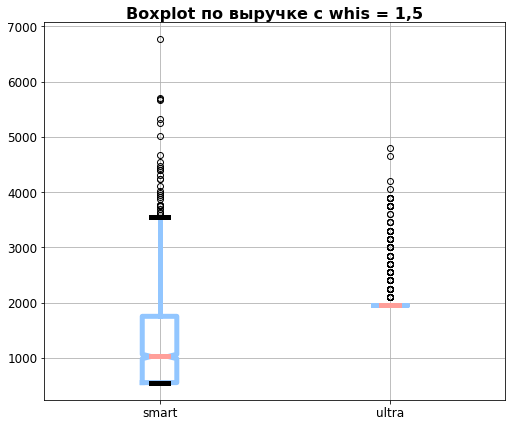

In [59]:
ax = df_event.boxplot(column='Sum_month_rub', by='Tariff', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))
ax.set_title('')
ax.title.set_size(40)
ax.set_xlabel('')
plt.suptitle('Boxplot по выручке с whis = 1,5', y=0.93, fontsize=16, fontweight='bold')

Расчёт границ интервалов.

In [60]:
revenue_int_smart, revenue_int_ultra = get_intervals('Sum_month_rub', 'Tariff')

Границы интервала для столбца "Sum_month_rub" тарифа "Смарт": 0.0 - 3550.0
Границы интервала для столбца "Sum_month_rub" тарифа "Ультра": 1950.0 - 1950.0


Посмотрим на среднюю выручку по тарифам "Смарт" и "Ультра".

In [61]:
smart_mean_revenue = df_event[(df_event['Tariff'] == 'smart') &
                                      (df_event['Sum_month_rub'] >= revenue_int_smart[0]) &
                                      (df_event['Sum_month_rub'] <= revenue_int_smart[1])]['Sum_month_rub']

ultra_mean_revenue = df_event[(df_event['Tariff'] == 'ultra') &
                                      (df_event['Sum_month_rub'] >= revenue_int_ultra[0]) &
                                      (df_event['Sum_month_rub'] <= revenue_int_ultra[1])]['Sum_month_rub']

In [62]:
smart_mean_revenue

8       1150
9        550
10       550
11      1150
12      1550
        ... 
3209    1750
3210     550
3211    1150
3212    1513
3213     598
Name: Sum_month_rub, Length: 2198, dtype: int64

In [63]:
ultra_mean_revenue

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
3171    1950
3179    1950
3186    1950
3188    1950
3190    1950
Name: Sum_month_rub, Length: 851, dtype: int64

Расчитаем p-value. Выборки у нас независимые, так что используем ttest_ind.

In [64]:
from scipy.stats import ttest_ind

In [65]:
stat, p = ttest_ind(smart_mean_revenue, ultra_mean_revenue)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -28.118667186869267
p-value = 7.1933865458e-155

Пороговое значение alpha = 0.05


## Итоги

1. p-value - вероятность ошибочного отклонения верной гипотезы. Чем меньше p-value, тем лучше. Для бизнеса мы правильно указали альфа - 0.05 (для других сфер меньше, например, медицина - 0.0001). p-value здесь меньше (e-176 = умножаем 10 в минус 176 степени). Таким образом, нулевую гипотезу отклоняем и <b>средняя выручка пользователей тарифа "Смарт" отличается от средней выручки пользователей тарифа "Ультра"</b>.
2. <b>Средняя выручка по тарифу "Ультра" больше</b>.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно сформулировал и проверил гипотезу
</div>

In [66]:
print('Средняя выручка по пользователям тарифа "Смарт" - {:.2f}'.format(smart_mean_revenue.mean()))
print('Средняя выручка по пользователям тарифа "Ультра" - {}'.format(ultra_mean_revenue.mean()))

Средняя выручка по пользователям тарифа "Смарт" - 1246.16
Средняя выручка по пользователям тарифа "Ультра" - 1950.0


Ожидаемо, что <b>выручка "Ультры" больше - на то она и дороже</b>. Хотя пользователи "Смарта", как мы поняли, регулярно заказывают дополнительные услуги, так как не укладываются в тариф.

Но как дела у окраины? Отличается ли от Москвы или нет? Добавим признак "Москвы".

In [67]:
df_event['is_Moscow'] = np.where(df_event['City'] == 'Москва', 1, 0)

In [68]:
df_event.head()

,Num_user,Month,Number_of_calls,Calls_min,Sms_num,Internet_mb,Tariff,City,Abonent_rub,Minuts_up,Sms_up,Mb_up,Pay_over_limit_rub,Sum_month_rub,is_Moscow
0,1000,5,17.0,159.0,22.0,2253.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0
1,1000,6,28.0,172.0,60.0,23232.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0
2,1000,7,41.0,340.0,75.0,14004.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0
3,1000,8,42.0,408.0,81.0,14054.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0
4,1000,9,46.0,466.0,57.0,14569.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0


Снова выдвинем две гипотезы. <b>H0</b> (нулевая гипотеза) - предположение о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. <b>H1</b> (альтернативная гипотеза) - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
В нулевой гипотезе мы всегда говорим о равенстве средних значений выборок, а в альтернативной об их различие.
    
Измени, пожалуйста, формулировку гипотез
</div>



<div class="alert alert-info">
    
Исправлено.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Все верно

</div>


Далее, нам необходимо построить боксплот.

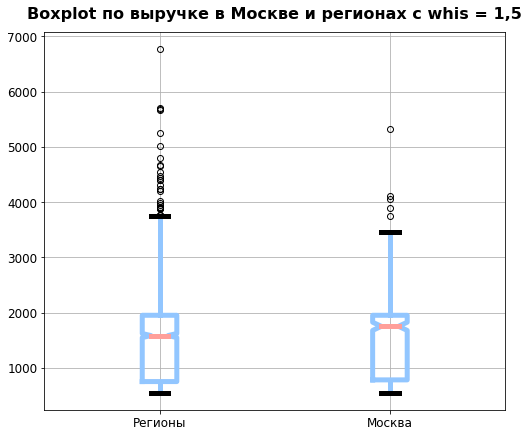

In [69]:
ax = df_event.boxplot(column='Sum_month_rub', by='is_Moscow', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Регионы'
labels[1] = 'Москва'

ax.set_xticklabels(labels)

plt.suptitle('Boxplot по выручке в Москве и регионах с whis = 1,5', y=0.95, fontsize=16, fontweight='bold')

ax.set_xlabel('')
ax.set_title('')
ax.title.set_size(40)

Рассчитаем границы интервалов:

In [70]:
revenue_int_smart, revenue_int_ultra = get_intervals('Sum_month_rub', 'is_Moscow')

Границы интервала для столбца "Sum_month_rub" для регионов: 550.0 - 3750.0
Границы интервала для столбца "Sum_month_rub" для Москвы: 550.0 - 3704.25


Произведём расчёт по Москве и регионам.

In [71]:
moscow_revenue = df_event[(df_event['City'] == 'Москва') &
                                  (df_event['Sum_month_rub'] >= revenue_int_smart[0]) &
                                  (df_event['Sum_month_rub'] <= revenue_int_smart[1])]['Sum_month_rub']

regions_revenue = df_event[(df_event['City'] != 'Москва') &
                                  (df_event['Sum_month_rub'] >= revenue_int_ultra[0]) &
                                  (df_event['Sum_month_rub'] <= revenue_int_ultra[1])]['Sum_month_rub']

Снова расчитаем p-value тем же способом.

In [72]:
stat, p = ttest_ind(moscow_revenue, regions_revenue)
print('t = {}\np-value = {:.2}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.4424034154413472
p-value = 0.15

Пороговое значение alpha = 0.05


Итог. p-value больше alpha.
Верно утверждение, что <b>средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов</b>.

## Общий вывод

Для подготовки общего вывода нам нужно собрать данные по всем средним используемых пакетов услуг.

In [73]:
smart_mean_internet = (df_event[(df_event['Tariff'] == 'smart')]['Internet_mb']/(1024 * 15)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Смарт" - {:.2%} = {:,.0f} Гб'.
      format(smart_mean_internet, smart_mean_internet * 1024 * 15))
smart_mean_calls = (df_event[(df_event['Tariff'] == 'smart')]['Calls_min']/(500)).mean()
print('Средний процент использования пакета минут по тарифу "Смарт" - {:.2%} = {:.2f} мин'.
      format(smart_mean_calls, smart_mean_calls * 500))
smart_mean_sms = (df_event[(df_event['Tariff'] == 'smart')]['Sms_num']/(50)).mean()
print('Средний процент использования пакета СМС по тарифу "Смарт" - {:.2%} = {:.0f} шт.'.
      format(smart_mean_sms, smart_mean_sms * 50))
print('---------------------------------------------------------------------------------')
ultra_mean_internet = (df_event[(df_event['Tariff'] == 'ultra')]['Internet_mb']/(1024 * 30)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Ультра" - {:.2%} = {:,.0f} Гб'.
      format(ultra_mean_internet, ultra_mean_internet * 1024 * 30))
ultra_mean_calls = (df_event[(df_event['Tariff'] == 'ultra')]['Calls_min']/(3000)).mean()
print('Средний процент использования пакета минут по тарифу "Ультра" - {:.2%} = {:.2f} мин'.
      format(ultra_mean_calls, ultra_mean_calls * 3000))
ultra_mean_sms = (df_event[(df_event['Tariff'] == 'ultra')]['Sms_num']/(1000)).mean()
print('Средний процент использования пакета СМС по тарифу "Ультра" - {:.2%} = {:.0f} шт.'.
      format(ultra_mean_sms, ultra_mean_sms * 1000))

Средний процент использования пакета интернет-трафика по тарифу "Смарт" - 105.52% = 16,208 Гб
Средний процент использования пакета минут по тарифу "Смарт" - 83.59% = 417.93 мин
Средний процент использования пакета СМС по тарифу "Смарт" - 66.77% = 33 шт.
---------------------------------------------------------------------------------
Средний процент использования пакета интернет-трафика по тарифу "Ультра" - 63.38% = 19,469 Гб
Средний процент использования пакета минут по тарифу "Ультра" - 17.55% = 526.62 мин
Средний процент использования пакета СМС по тарифу "Ультра" - 4.94% = 49 шт.


Также, нужно подготовить информацию по средним превышениям пакетов.

In [74]:
smart_over_mean_internet = df_event[(df_event['Tariff'] == 'smart')]['Mb_up'].mean()
smart_over_mean_internet_rub = np.round(smart_over_mean_internet, -3)/1000 * 200
print('Среднее превышение пакета интернет по тарифу "Смарт" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(smart_over_mean_internet, smart_over_mean_internet_rub))

smart_over_mean_calls = np.ceil(df_event[(df_event['Tariff'] == 'smart')]['Minuts_up'].mean())
smart_over_mean_calls_rub = smart_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Смарт" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(smart_over_mean_calls, smart_over_mean_calls_rub))

smart_over_mean_sms = np.ceil(df_event[(df_event['Tariff'] == 'smart')]['Sms_up'].mean())
smart_over_mean_sms_rub = smart_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Смарт" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(smart_over_mean_sms, smart_over_mean_sms_rub))

print('----------------------------------------------------------------')

ultra_over_mean_internet = df_event[(df_event['Tariff'] == 'ultra')]['Mb_up'].mean()
ultra_over_mean_internet_rub = np.round(ultra_over_mean_internet, -3)/1000 * 150
print('Среднее превышение пакета интернет по тарифу "Ультра" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(ultra_over_mean_internet, ultra_over_mean_internet_rub))

ultra_over_mean_calls = np.ceil(df_event[(df_event['Tariff'] == 'ultra')]['Minuts_up'].mean())
ultra_over_mean_calls_rub = ultra_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Ультра" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(ultra_over_mean_calls, ultra_over_mean_calls_rub))

ultra_over_mean_sms = np.ceil(df_event[(df_event['Tariff'] == 'ultra')]['Sms_up'].mean())
ultra_over_mean_sms_rub = ultra_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Ультра" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(ultra_over_mean_sms, ultra_over_mean_sms_rub))

Среднее превышение пакета интернет по тарифу "Смарт" - 2756 Мб на сумму - 600 руб.
Среднее превышение пакета минут по тарифу "Смарт" - 42 мин на сумму - 126 руб.
Среднее превышение пакета СМС по тарифу "Смарт" - 6 шт. на сумму - 18 руб.
----------------------------------------------------------------
Среднее превышение пакета интернет по тарифу "Ультра" - 750 Мб на сумму - 150 руб.
Среднее превышение пакета минут по тарифу "Ультра" - 0 мин на сумму - 0 руб.
Среднее превышение пакета СМС по тарифу "Ультра" - 0 шт. на сумму - 0 руб.


И информацию по выручке по каждому тарифу. Для наглядности это можно сделать в виде диаграммы.

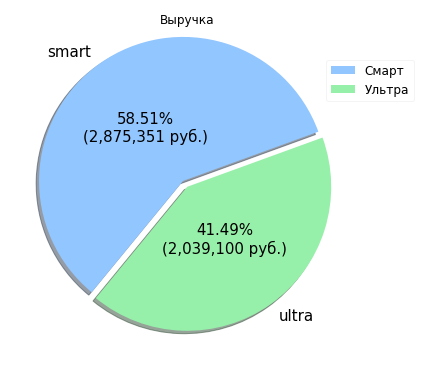

In [75]:
all_revenue = df_event['Sum_month_rub'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event.groupby('Tariff')['Sum_month_rub'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
    
ax.title.set_size(40)
plt.tight_layout(pad=0)

Тариф "Смарт" приносит 58 процентов выручки. Тариф "Ультра" - 42. Однако, число пользователей неравнозначно: у тарифа "Ультра" их более, чем в 2 раза меньше. Также, пользователи тарифа "Смарт" формируют выручку за счёт заказа дополнительных услуг интернета, которые входят в тариф с объёмом 15 Гб. В тарифе "Ультра" трафика предостаточно.

Возможно, "Мегалайну" нужно создать тариф с промежуточными показателями между "Смарт" и "Ультра". Учитывая то, что средний пользователь тарифа дозаказывает 2 Гб на 400 рублей, т.е. платит в итоге 550 + 400 = 950 рублей за месяц, это значит, что эти деньги клиент готов тратить в месяц в качестве абонентской платы.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Отличный вывод
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Спасибо за твою работу! Ты хорошо справился с анализом данных и проверкой гипотез. У тебя получились отличные графики и выводы.

Осталось немного доработать проект:

* изменить способ округления длительности звонков
* использовать метод merge для объединения таблиц
* исправить названия признаков
* исправить формулировку гипотез  о Москве и регионах

Жду твои исправления:)

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Спасибо, что учел мои комментарии. Надеюсь, эта работа была полезна для тебя. Я принимаю твой проект и желаю удачи в прохождении курса!

</div>